# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [102]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [33]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 572
['east london', 'kingston', 'nizhneangarsk', 'papatowai', 'san antonio de pale', 'port-aux-francais', 'taiohae', 'rio grande', 'aasiaat', 'hamilton', 'youhao', 'viligili', 'kutum', 'tabora', 'invercargill', 'kodiak', 'senador jose porfirio', 'udachny', 'adamstown', 'badger', 'bethel', 'nikolayevsk-on-amure', 'iqaluit', 'aykhal', 'magadan', 'saipan', 'luganville', 'nahiyat ash shinafiyah', 'puerto ayora', 'blackmans bay', 'waitangi', 'grytviken', 'vyazemskiy', 'olonkinbyen', 'rio gallegos', 'urganch', 'sao joao da barra', 'rongelap', 'albany', 'villa alberto andres alvarado aramburo', 'edinburgh of the seven seas', 'san diego', 'leh', 'puerto natales', 'kristiansund', 'monrovia', 'mar del plata', 'margaret river', 'ilulissat', 'sengkang', 'avarua', 'tyukhtet', 'tura', 'vingt cinq', 'weno', 'port alfred', 'west island', 'phan rang-thap cham', 'weligama', 'nouadhibou', 'waynesville', 'ranohira', 'longyearbyen', 'port elizabeth', 'nemuro', 'tralee', 'veyde

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [75]:
base_url = "https://api.openweathermap.org/data/2.5/weather?"
city_url =f"{base_url}q=london&appid={weather_api_key}&units=metric"
print(city_url)
# city_url = requests.get(base_url)
response_city=requests.get(city_url)
print(response_city)
# print(json.dumps(response_city,indent=4,sort_keys=True))
#f"{base_url}appid={weaf"{base_url}appid={weather_api_key}&city={city_data}&q="ther_api_key}&city={city_data}&q="

https://api.openweathermap.org/data/2.5/weather?q=london&appid=9cdc9fc0c34af35f3d3592d14845a774&units=metric
<Response [200]>


In [76]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    response = requests.get(f"{base_url}q={city}&appid={weather_api_key}&units=metric")

    weather_data= response.json()

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = weather_data["weather"]
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_data["coord"]["lat"]
        city_lng = weather_data["coord"]["lon"]
        city_max_temp = weather_data["main"]["temp_max"]
        city_humidity = weather_data["main"]["humidity"]
        city_clouds = weather_data["clouds"]["all"]
        city_wind = weather_data["wind"]["speed"]
        city_country = weather_data["sys"]["country"]
        city_date = weather_data["dt"]

         # Append the City information into city_data list
        city_data.append({"City": city,
                           "Lat": city_lat,
                           "Lng": city_lng,
                           "Max Temp": city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind,
                           "Country": city_country,
                           "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | east london
Processing Record 2 of Set 1 | kingston
Processing Record 3 of Set 1 | nizhneangarsk
Processing Record 4 of Set 1 | papatowai
Processing Record 5 of Set 1 | san antonio de pale
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | taiohae
City not found. Skipping...
Processing Record 8 of Set 1 | rio grande
Processing Record 9 of Set 1 | aasiaat
Processing Record 10 of Set 1 | hamilton
Processing Record 11 of Set 1 | youhao
Processing Record 12 of Set 1 | viligili
City not found. Skipping...
Processing Record 13 of Set 1 | kutum
Processing Record 14 of Set 1 | tabora
Processing Record 15 of Set 1 | invercargill
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | senador jose porfirio
Processing Record 18 of Set 1 | udachny
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | badger
Processing Record 21 of Set 1 | bethel

In [77]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          541
Lat           541
Lng           541
Max Temp      541
Humidity      541
Cloudiness    541
Wind Speed    541
Country       541
Date          541
dtype: int64

In [78]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,east london,-33.0153,27.9116,23.75,88,100,10.37,ZA,1737576115
1,kingston,17.9970,-76.7936,30.09,70,40,8.23,JM,1737575901
2,nizhneangarsk,55.7833,109.5500,-13.61,86,66,1.63,RU,1737576117
3,papatowai,-46.5619,169.4708,13.82,97,100,3.61,NZ,1737576118
4,san antonio de pale,-1.4014,5.6325,26.86,81,64,5.68,GQ,1737576120


In [81]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [82]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,east london,-33.0153,27.9116,23.75,88,100,10.37,ZA,1737576115
1,kingston,17.9970,-76.7936,30.09,70,40,8.23,JM,1737575901
2,nizhneangarsk,55.7833,109.5500,-13.61,86,66,1.63,RU,1737576117
3,papatowai,-46.5619,169.4708,13.82,97,100,3.61,NZ,1737576118
4,san antonio de pale,-1.4014,5.6325,26.86,81,64,5.68,GQ,1737576120


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

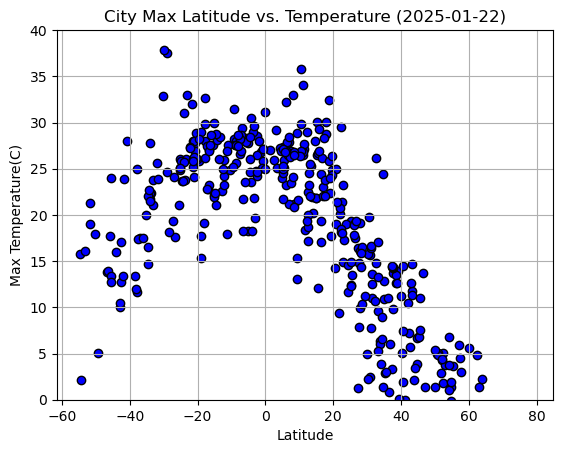

In [89]:
# Build scatter plot for latitude vs. temperature
plt.scatter((city_data_df["Lat"]),(city_data_df["Max Temp"]),marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature (2025-01-22)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.ylim(0,40)
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

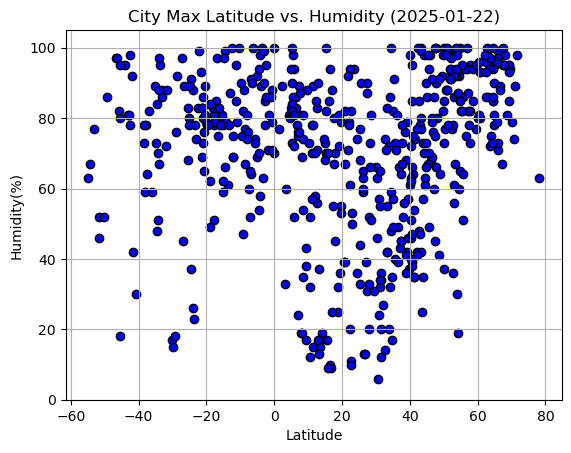

In [94]:
# Build scatter plot for latitude vs. Humidity
plt.scatter((city_data_df["Lat"]),(city_data_df["Humidity"]),marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Humidity (2025-01-22)")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.ylim(0,105)
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

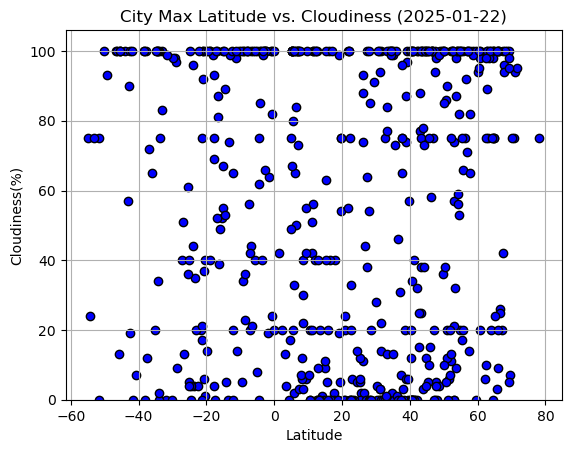

In [95]:
# Build scatter plot for latitude vs. Cloudiness
plt.scatter((city_data_df["Lat"]),(city_data_df["Cloudiness"]),marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Cloudiness (2025-01-22)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.ylim(0,106)
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

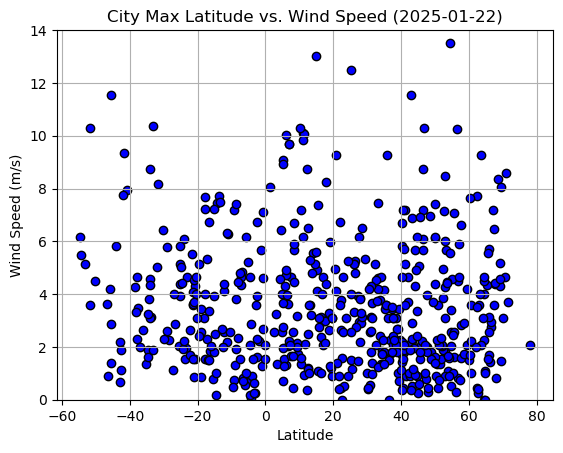

In [96]:
# Build scatter plot for latitude vs. Wind speed
plt.scatter((city_data_df["Lat"]),(city_data_df["Wind Speed"]),marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Wind Speed (2025-01-22)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.ylim(0,14)
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [99]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kingston,17.9970,-76.7936,30.09,70,40,8.23,JM,1737575901
2,nizhneangarsk,55.7833,109.5500,-13.61,86,66,1.63,RU,1737576117
7,aasiaat,68.7098,-52.8699,-5.65,81,100,8.37,GL,1737576125
8,hamilton,39.1834,-84.5333,-5.77,42,97,2.68,US,1737576126
9,youhao,47.8667,128.8333,-27.32,100,98,0.30,CN,1737576127


In [100]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df["Lat"]<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,east london,-33.0153,27.9116,23.75,88,100,10.37,ZA,1737576115
3,papatowai,-46.5619,169.4708,13.82,97,100,3.61,NZ,1737576118
4,san antonio de pale,-1.4014,5.6325,26.86,81,64,5.68,GQ,1737576120
5,port-aux-francais,-49.3500,70.2167,5.02,86,93,14.50,TF,1737576121
6,rio grande,-32.0350,-52.0986,25.58,72,0,5.02,BR,1737576123


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7298831639910319


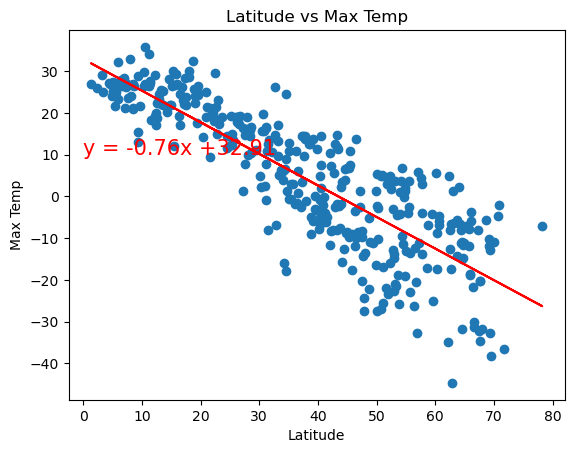

In [112]:
# Linear regression on Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.title(f"Latitude vs Max Temp")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

The r^2-value is: 0.33872242309720185


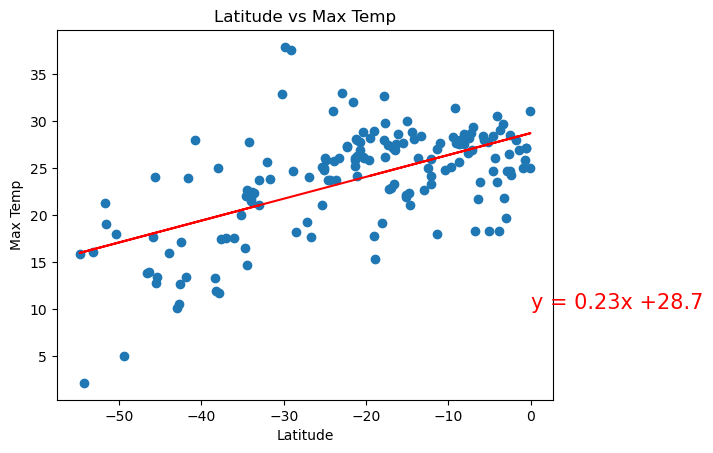

In [113]:
# Linear regression on Southern Hemisphere
# Linear regression on Northern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.title(f"Latitude vs Max Temp")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE


### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.1371217320872958


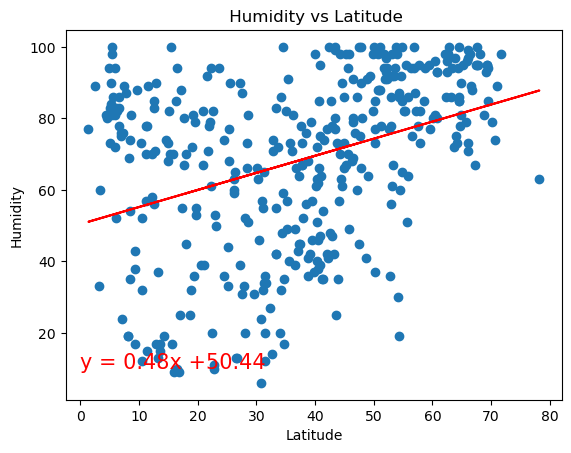

In [120]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.title(f" Humidity vs Latitude")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

The r^2-value is: 0.03874190741854498


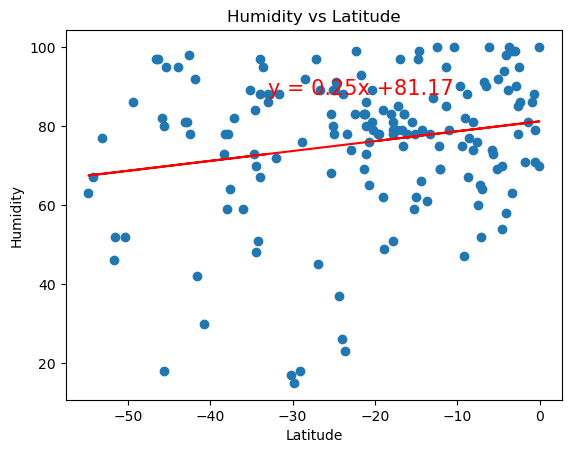

In [125]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.annotate(line_eq,(x_values.iloc[0], y_values.iloc[0]),fontsize=15,color="red")
plt.title(f"Humidity vs Latitude")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.057172886349690887


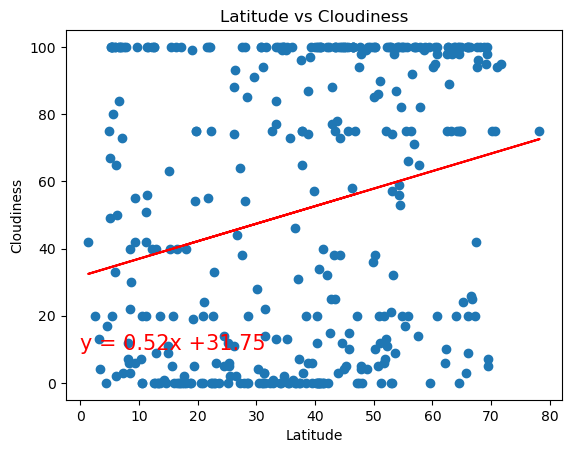

In [127]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.title(f"Latitude vs Cloudiness")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

The r^2-value is: 0.0021819017018207647


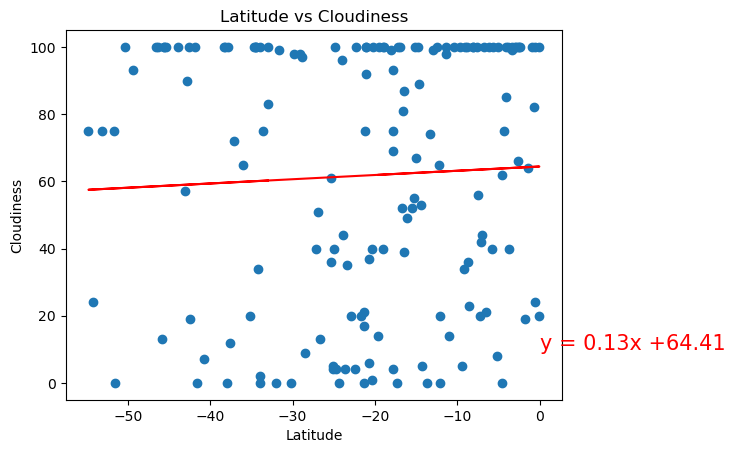

In [128]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.title(f"Latitude vs Cloudiness")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0035223030946559394


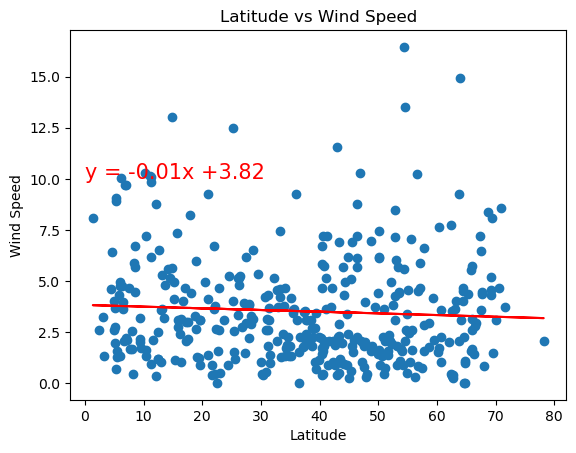

In [131]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.title(f"Latitude vs Wind Speed")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

The r^2-value is: 0.07944665969837293


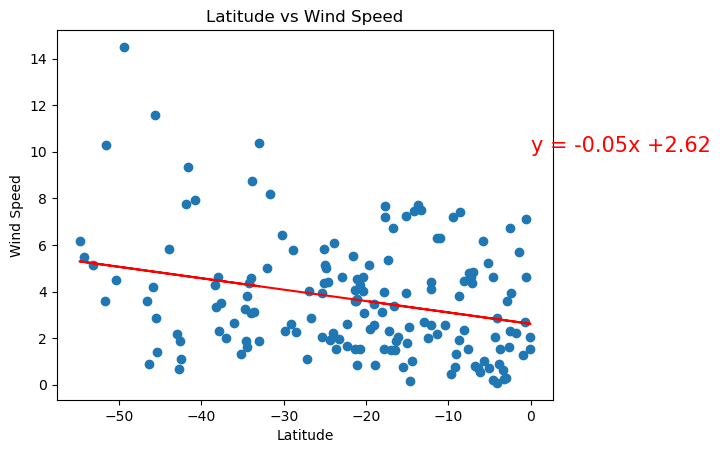

In [132]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.title(f"Latitude vs Wind Speed")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE